# **Complete Dataset**

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split
import pickle
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
file_path = 'Strokesdataset.csv'
data = pd.read_csv(file_path)

In [3]:
# Display the first few rows of the dataset
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [4]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [5]:
# Data types of each column
data_types = data.dtypes
print("Data Types:\n", data_types)

Data Types:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [6]:
# Fill missing values in the 'smoking_status' column with the mode
data['smoking_status'].fillna(data['smoking_status'].mode()[0], inplace=True)

# Fill missing values in the 'hypertension' column with the most frequent value
data['hypertension'].fillna(data['hypertension'].value_counts().index[0], inplace=True)

# Fill missing values in the 'heart_disease' column with the most frequent value
data['heart_disease'].fillna(data['heart_disease'].value_counts().index[0], inplace=True)

# Fill missing values in the 'avg_glucose_level' column with the mean
data['avg_glucose_level'].fillna(data['avg_glucose_level'].mean(), inplace=True)

# Check for missing values again
missing_values = data.isnull().sum()
print("Missing Values after imputation:\n", missing_values)

Missing Values after imputation:
 id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1462
smoking_status          0
stroke                  0
dtype: int64


In [7]:
# Impute missing values in bmi with the median
imputer_bmi = SimpleImputer(strategy='median')
data['bmi'] = imputer_bmi.fit_transform(data[['bmi']])

# Encode categorical variables
label_encoder = LabelEncoder()
data['gender'] = label_encoder.fit_transform(data['gender'])
data['ever_married'] = label_encoder.fit_transform(data['ever_married'])
data['work_type'] = label_encoder.fit_transform(data['work_type'])
data['Residence_type'] = label_encoder.fit_transform(data['Residence_type'])
data['smoking_status'] = label_encoder.fit_transform(data['smoking_status'])

In [8]:
# Feature scaling
scaler = StandardScaler()
data[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(data[['age', 'avg_glucose_level', 'bmi']])

# Display the cleaned and preprocessed data
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,-1.741517,0,0,0,4,0,-0.217176,-1.384161,1,0
1,30468,1,0.700823,1,0,1,2,1,-0.383258,1.390824,1,0
2,16523,0,-1.519486,0,0,0,2,1,0.148621,-1.436520,1,0
3,56543,0,1.233697,0,0,1,2,0,-0.822123,0.958869,0,0
4,46136,1,-1.253049,0,0,0,1,0,1.317458,-1.240176,1,0


<ipython-input-9-ff874b5f7152>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=data, palette='viridis')


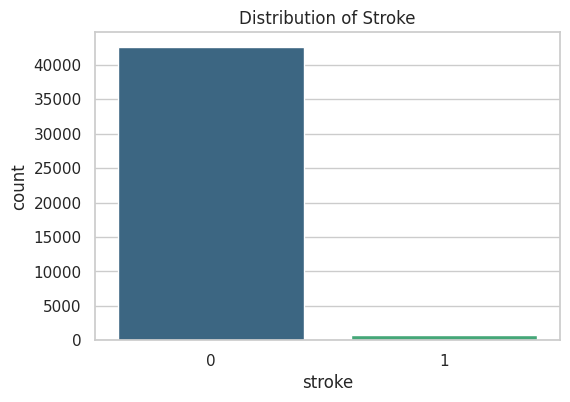

In [9]:
# Categorical feature analysis
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Distribution of the target variable (stroke)
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=data, palette='viridis')
plt.title('Distribution of Stroke')
plt.show()

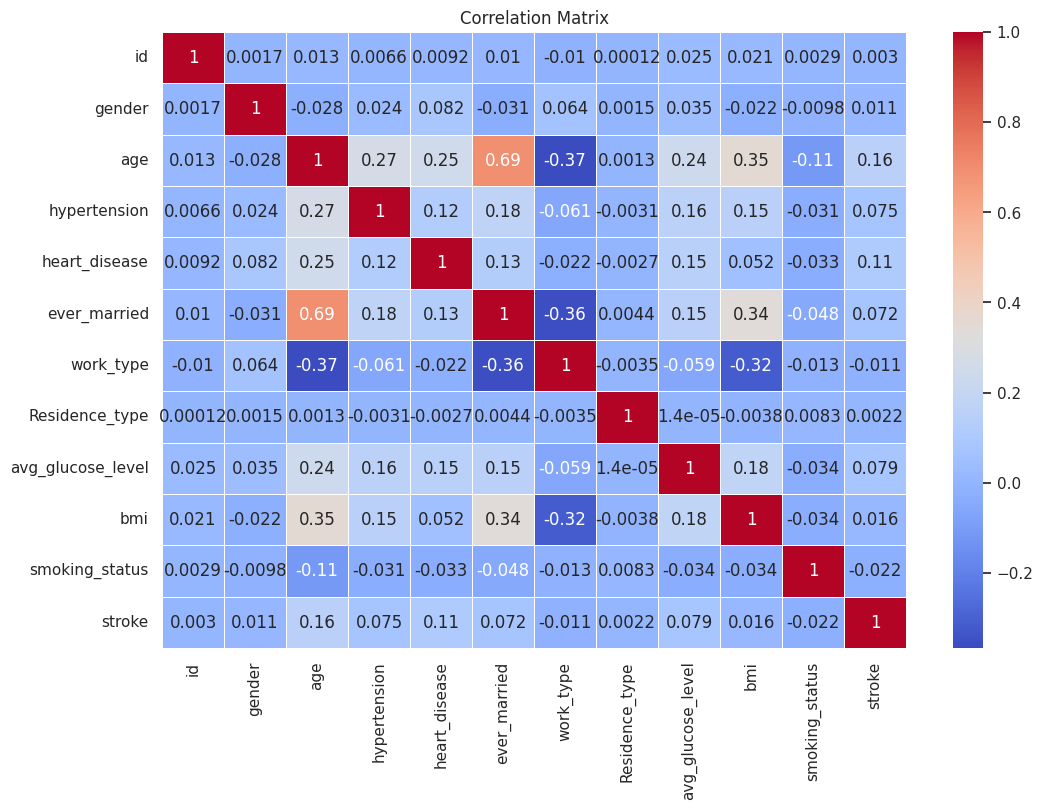

In [10]:
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

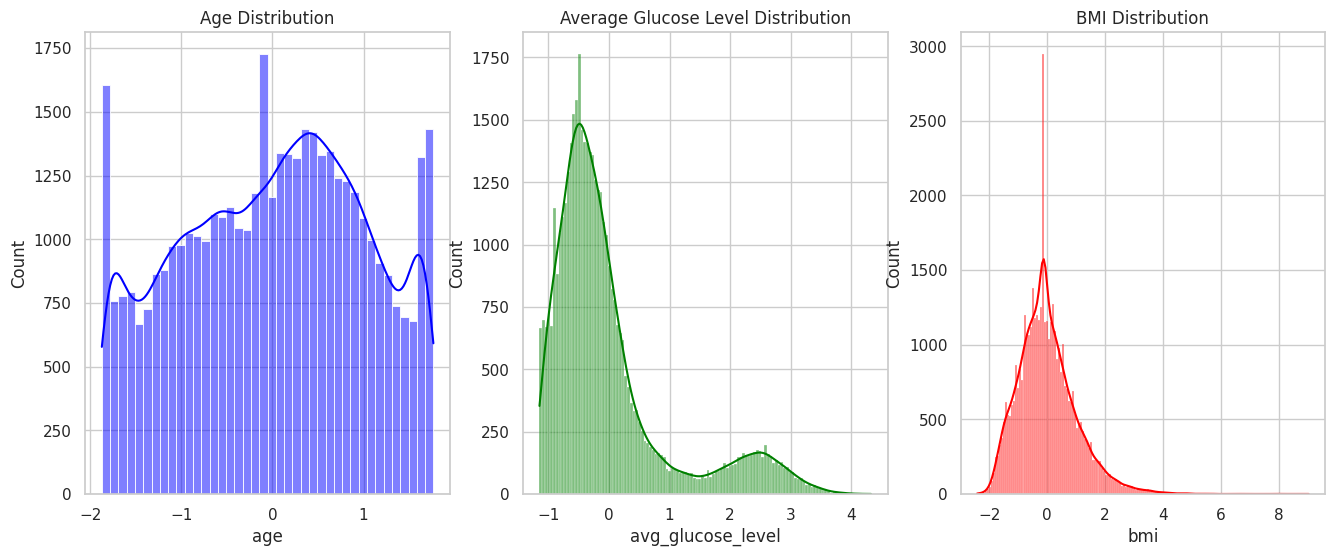

In [11]:
# Distribution of numerical features
plt.figure(figsize=(16, 6))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(data['age'], kde=True, color='blue')
plt.title('Age Distribution')

# Average glucose level distribution
plt.subplot(1, 3, 2)
sns.histplot(data['avg_glucose_level'], kde=True, color='green')
plt.title('Average Glucose Level Distribution')

# BMI distribution
plt.subplot(1, 3, 3)
sns.histplot(data['bmi'], kde=True, color='red')
plt.title('BMI Distribution')

plt.show()

<ipython-input-12-a66b068768b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')
<ipython-input-12-a66b068768b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')
<ipython-input-12-a66b068768b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')
<ipython-input-12-a66b068768b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

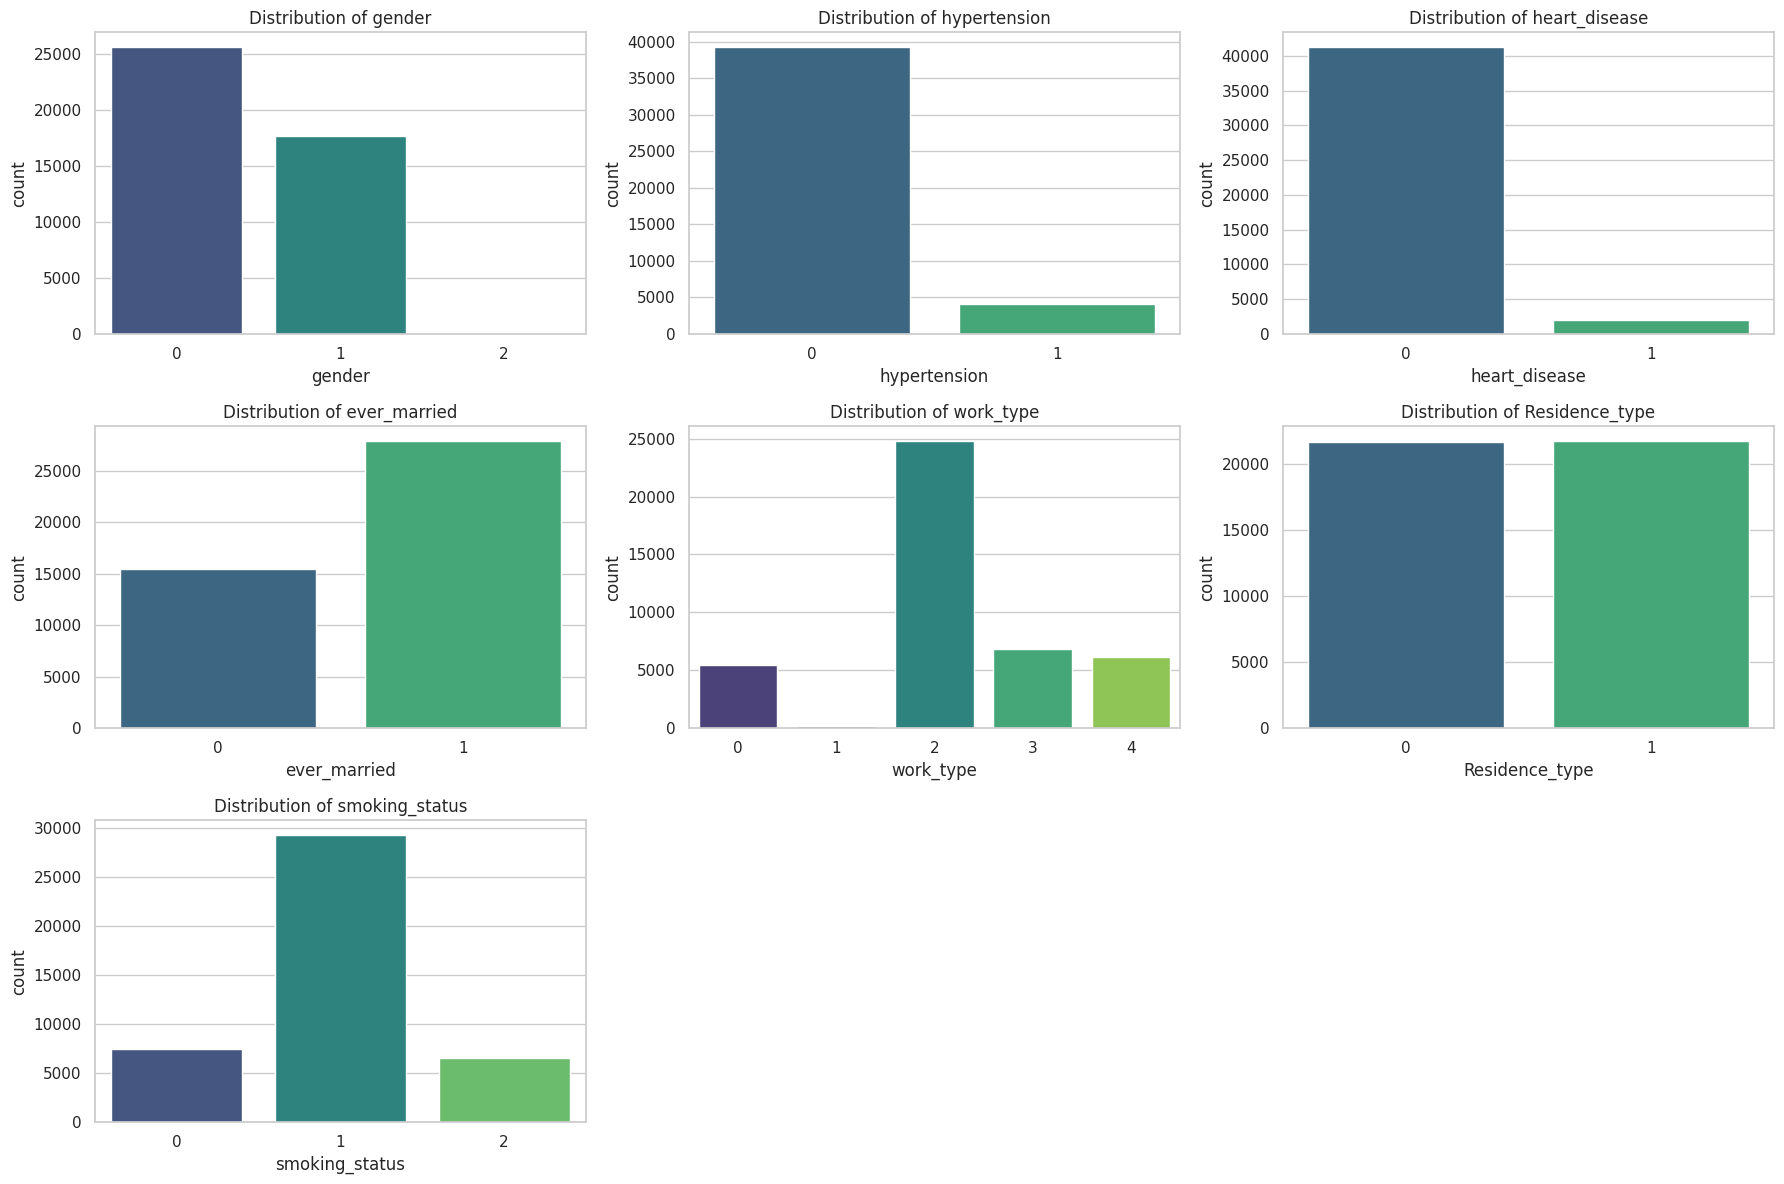

In [12]:
plt.figure(figsize=(18, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

<ipython-input-13-a66b068768b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')
<ipython-input-13-a66b068768b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')
<ipython-input-13-a66b068768b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=feature, data=data, palette='viridis')
<ipython-input-13-a66b068768b8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` an

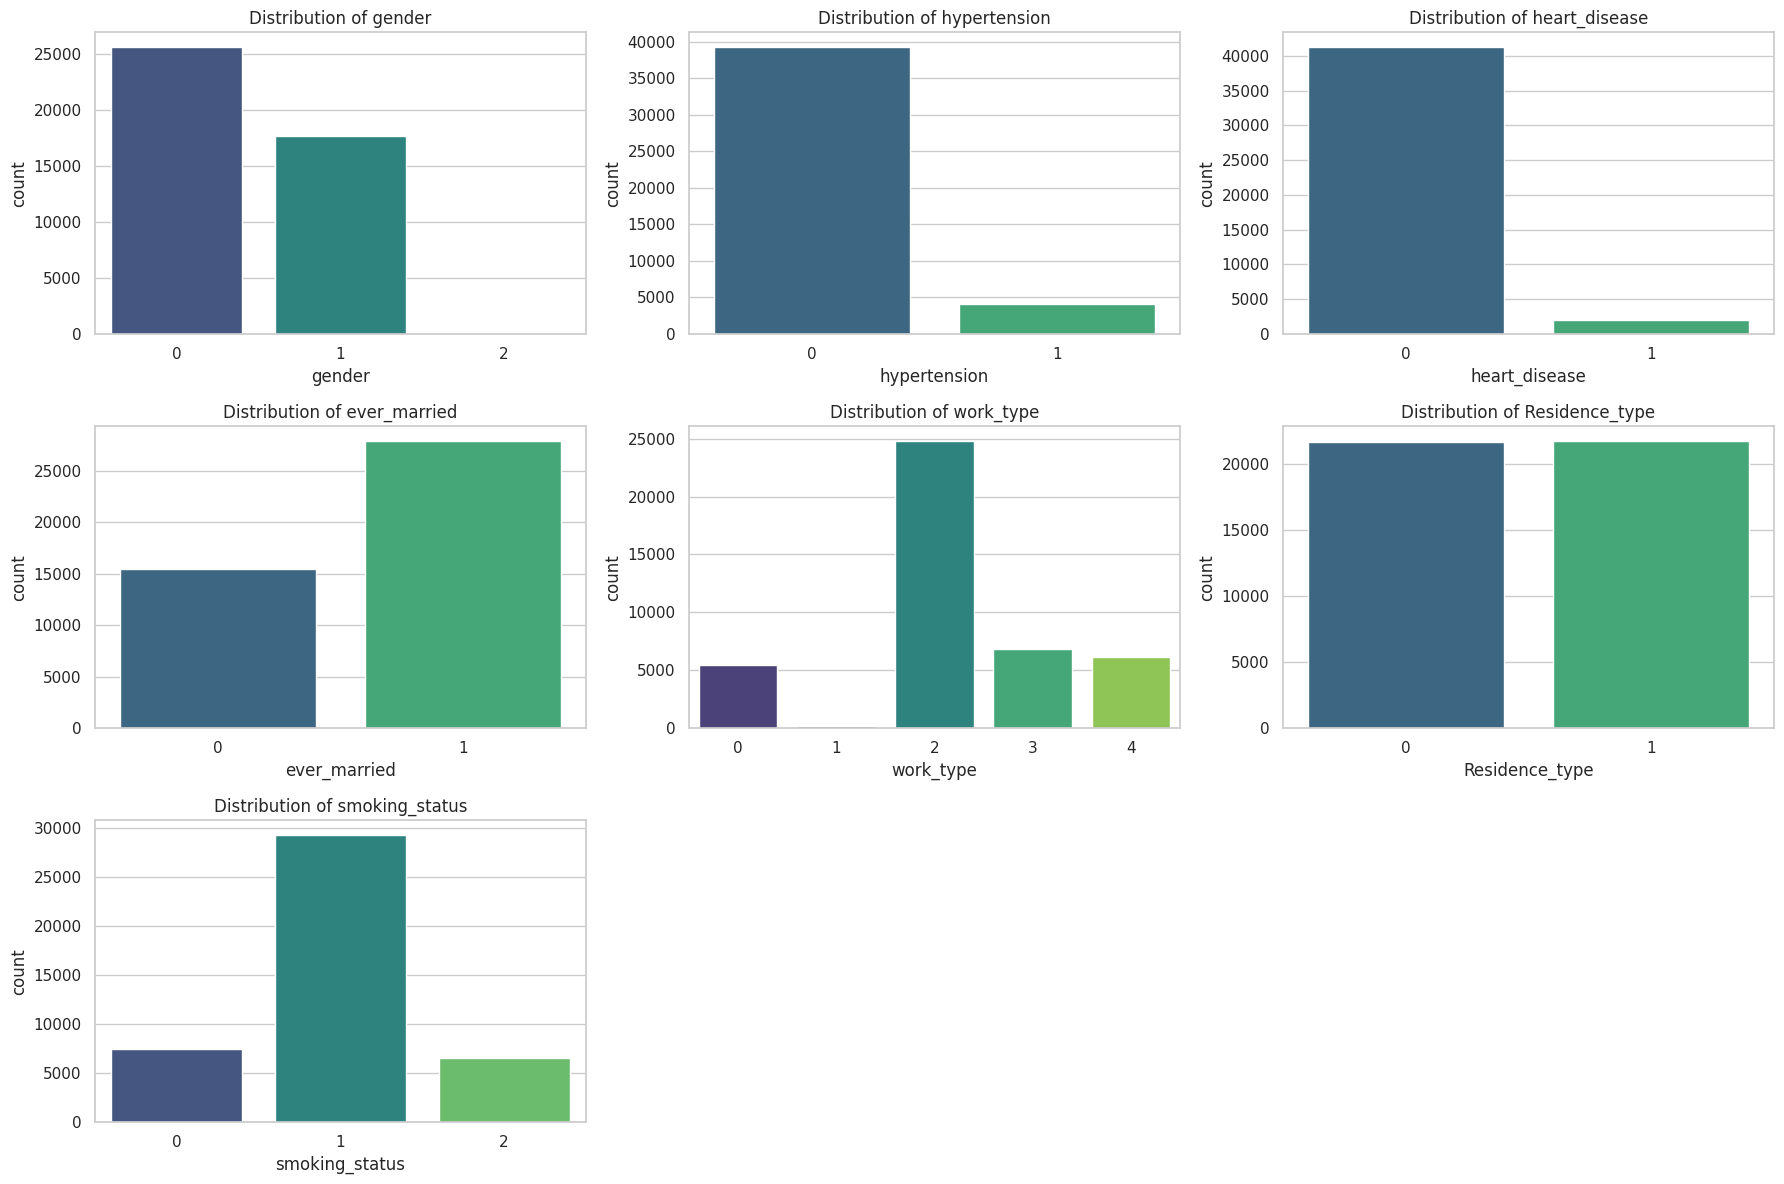

In [13]:
plt.figure(figsize=(18, 12))

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=feature, data=data, palette='viridis')
    plt.title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()

In [14]:
# Splitting features and target
X = data.drop(columns=['id', 'stroke'])
y = data['stroke']

# Train-test split for the balanced dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    class_report = classification_report(y_test, y_pred_test)
    conf_matrix = confusion_matrix(y_test, y_pred_test)

    return train_accuracy, test_accuracy, class_report, conf_matrix

In [15]:
# Function to plot ROC and AUC curve
def plot_roc_auc(model, X_test, y_test, model_name):
    y_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


SVM - Train Accuracy: 0.9819618169848584, Test Accuracy: 0.9819508448540707
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



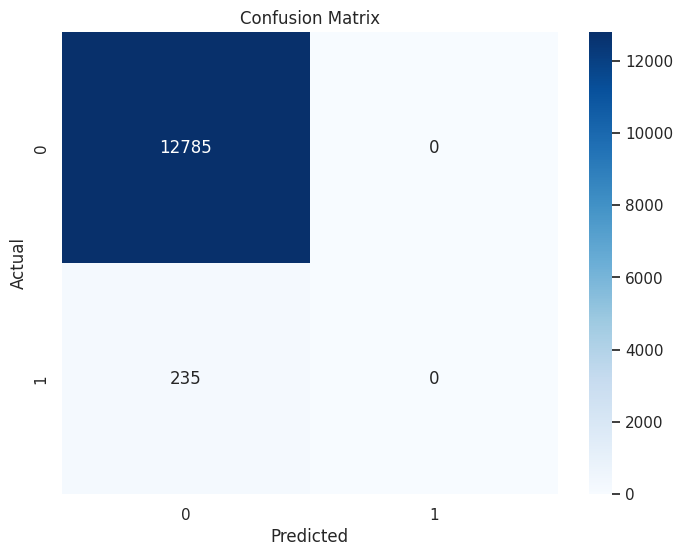

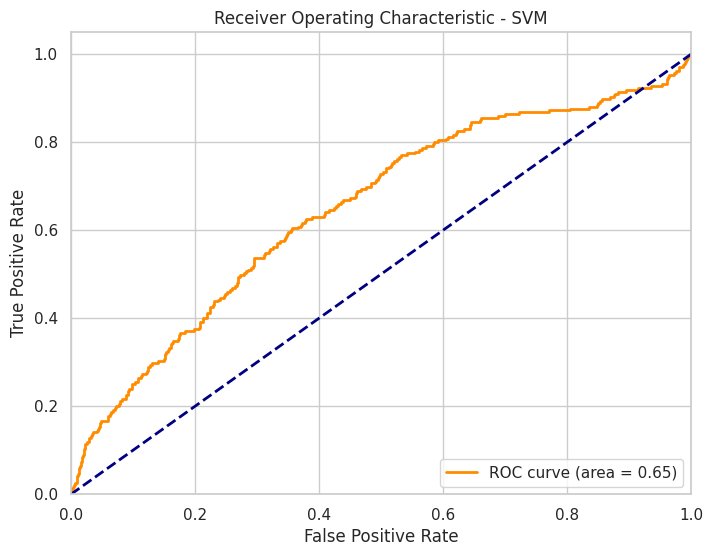

Random Forest - Train Accuracy: 1.0, Test Accuracy: 0.9817204301075269
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.00      0.00      0.00       235

    accuracy                           0.98     13020
   macro avg       0.49      0.50      0.50     13020
weighted avg       0.96      0.98      0.97     13020



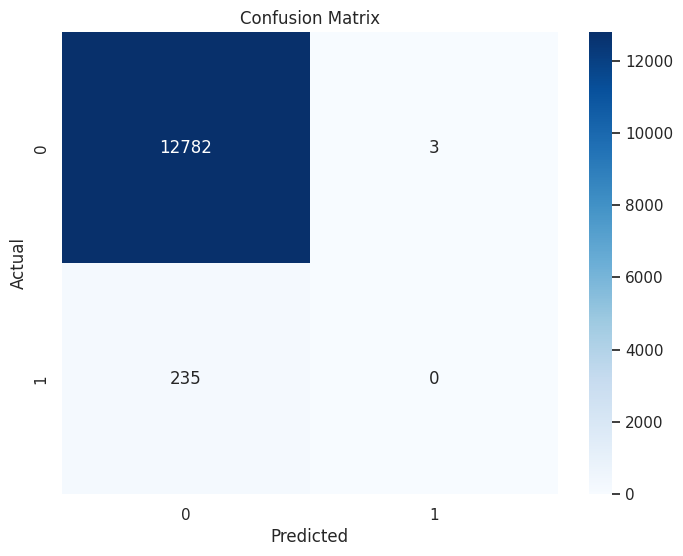

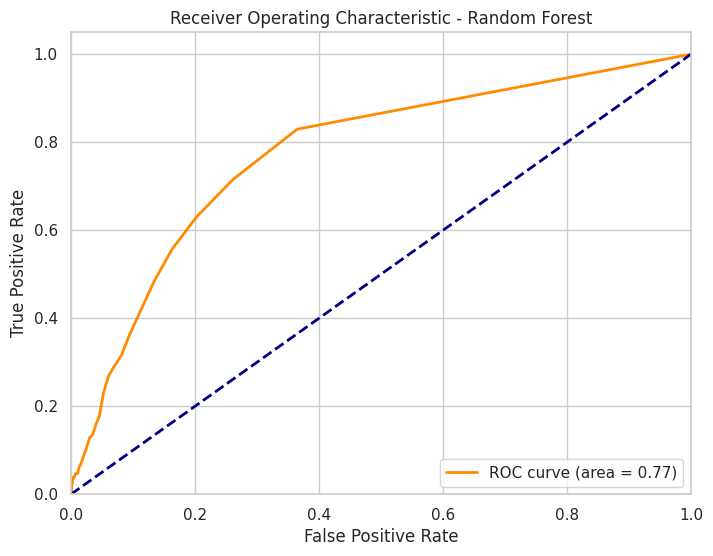

KNN - Train Accuracy: 0.9822251481237656, Test Accuracy: 0.9814132104454685
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     12785
           1       0.11      0.00      0.01       235

    accuracy                           0.98     13020
   macro avg       0.55      0.50      0.50     13020
weighted avg       0.97      0.98      0.97     13020



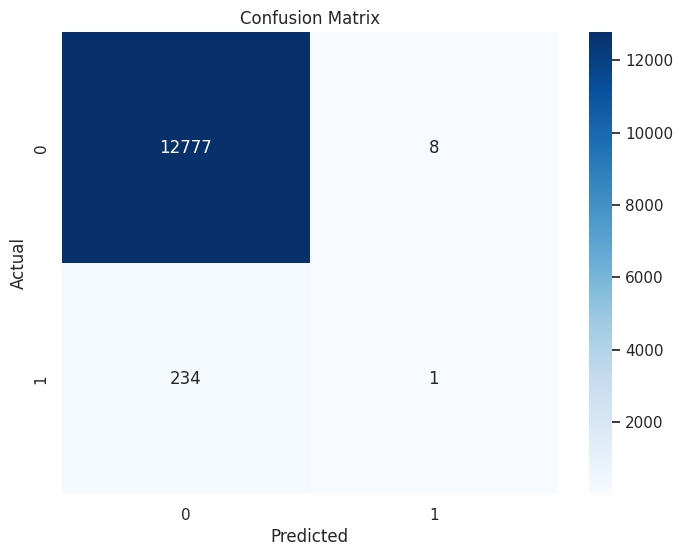

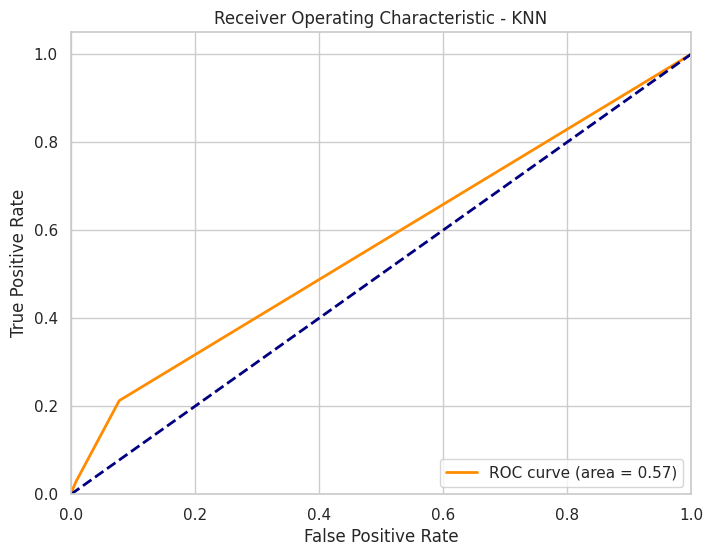

Decision Tree - Train Accuracy: 1.0, Test Accuracy: 0.9626728110599079
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     12785
           1       0.07      0.09      0.08       235

    accuracy                           0.96     13020
   macro avg       0.53      0.54      0.53     13020
weighted avg       0.97      0.96      0.96     13020



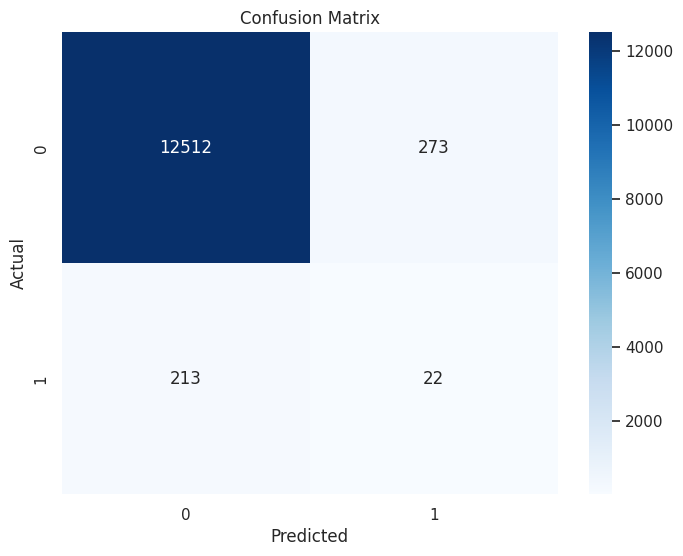

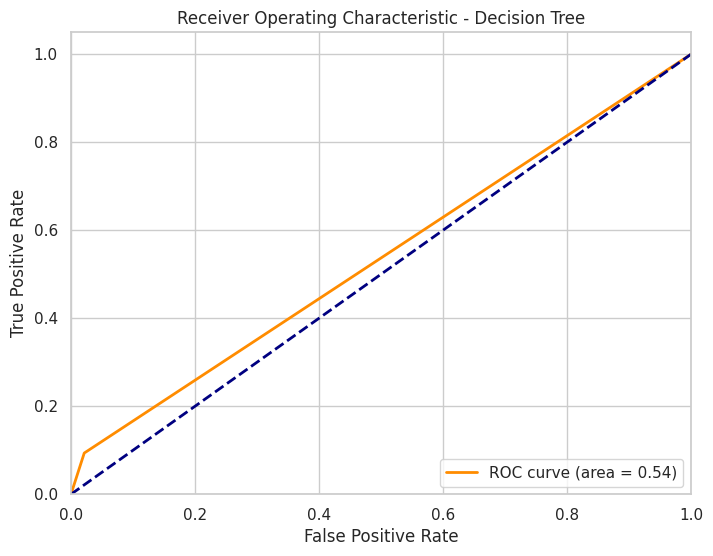

In [16]:
# Models
models = {
    'SVM': SVC(kernel='linear', probability=True),
    'Random Forest': RandomForestClassifier(),
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier()
}

# Train and evaluate each model on balanced data
accuracy_results = {}
for name, model in models.items():
    train_accuracy, test_accuracy, class_report, conf_matrix = train_and_evaluate_model(model, X_train, y_train, X_test, y_test)
    accuracy_results[name] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}
    print(f"{name} - Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
    print("Classification Report:")
    print(class_report)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("\n")
    plot_roc_auc(model, X_test, y_test, name)

In [17]:
# Splitting features and target
X_full = data.drop(columns=['id', 'stroke'])
y_full = data['stroke']

# Perform SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_full, y_full)

# Train-test split for the resampled dataset
X_train_smote, X_test_smote, y_train_smote, y_test_smote = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

SVM (after SMOTE) - Train Accuracy: 0.782092754303337, Test Accuracy: 0.7806890618278519
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.73      0.77     12778
           1       0.75      0.83      0.79     12793

    accuracy                           0.78     25571
   macro avg       0.78      0.78      0.78     25571
weighted avg       0.78      0.78      0.78     25571



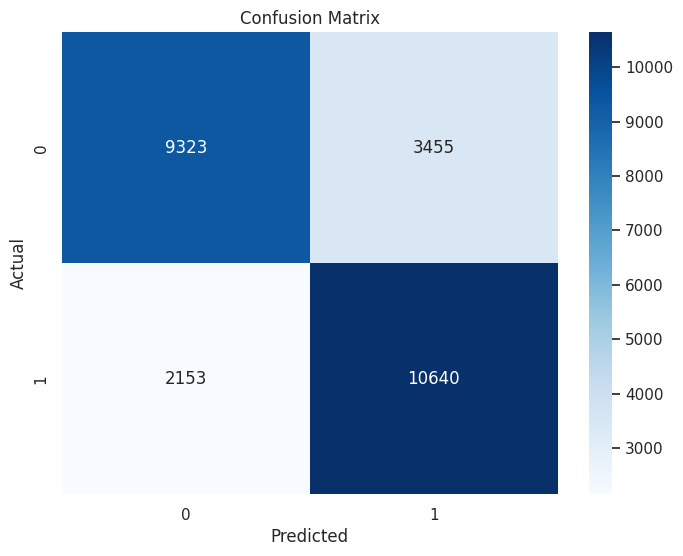

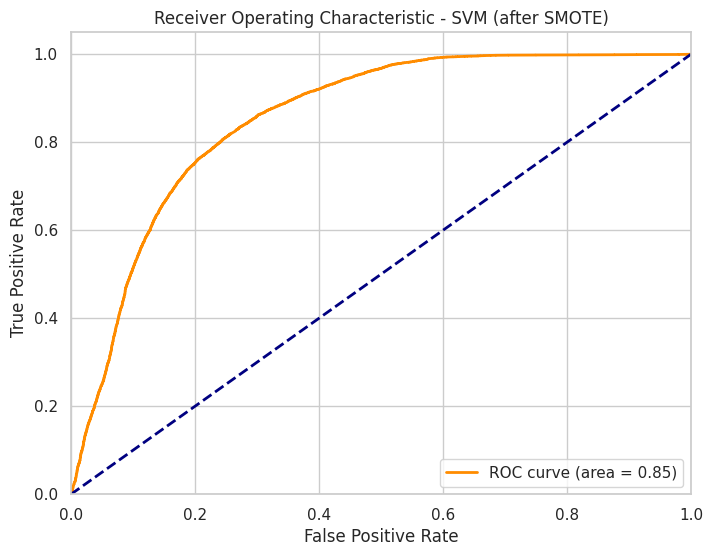

Random Forest (after SMOTE) - Train Accuracy: 1.0, Test Accuracy: 0.9615580149387979
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.94      0.96     12778
           1       0.94      0.98      0.96     12793

    accuracy                           0.96     25571
   macro avg       0.96      0.96      0.96     25571
weighted avg       0.96      0.96      0.96     25571



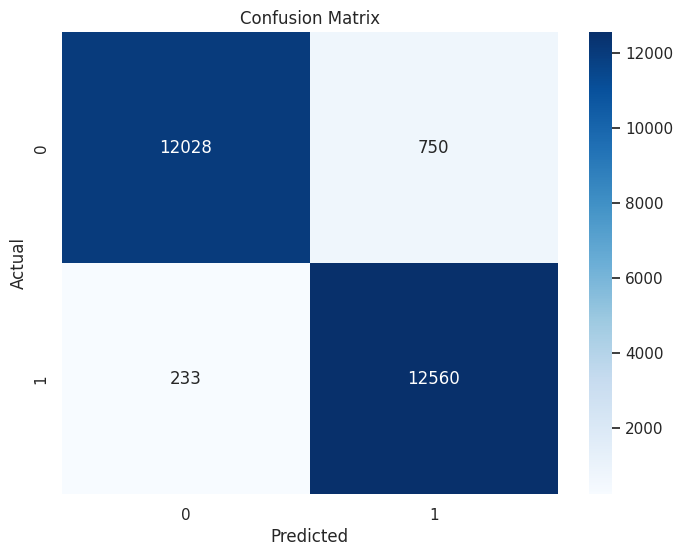

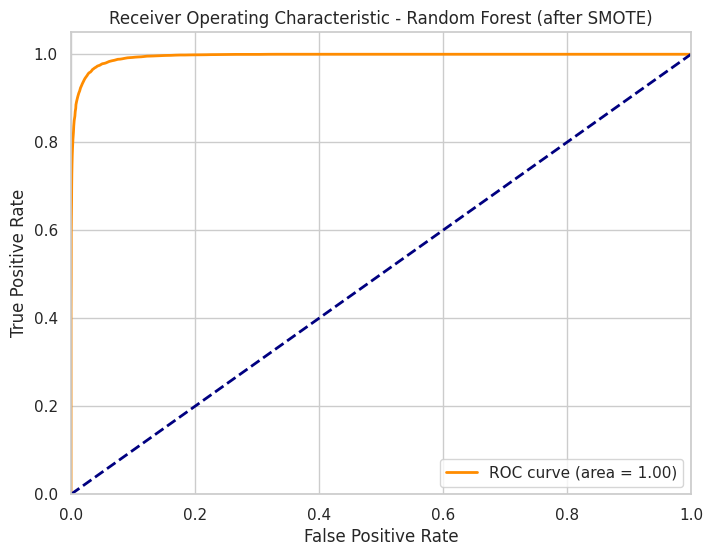

KNN (after SMOTE) - Train Accuracy: 0.9391750331025929, Test Accuracy: 0.9188142818036057
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.85      0.91     12778
           1       0.87      0.99      0.92     12793

    accuracy                           0.92     25571
   macro avg       0.93      0.92      0.92     25571
weighted avg       0.93      0.92      0.92     25571



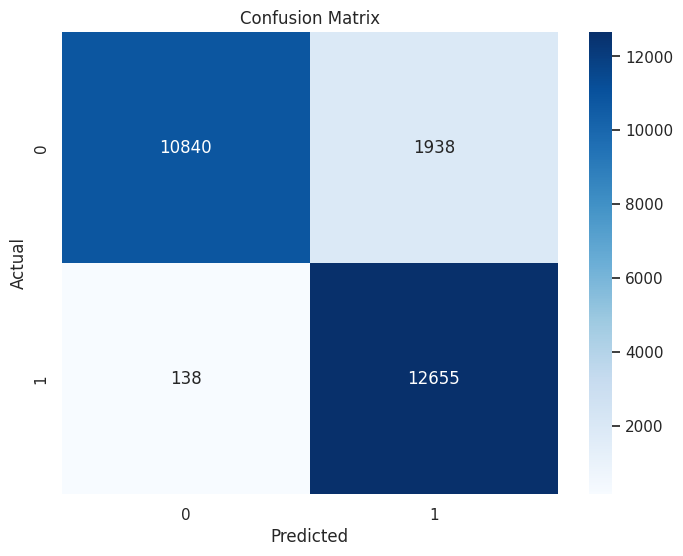

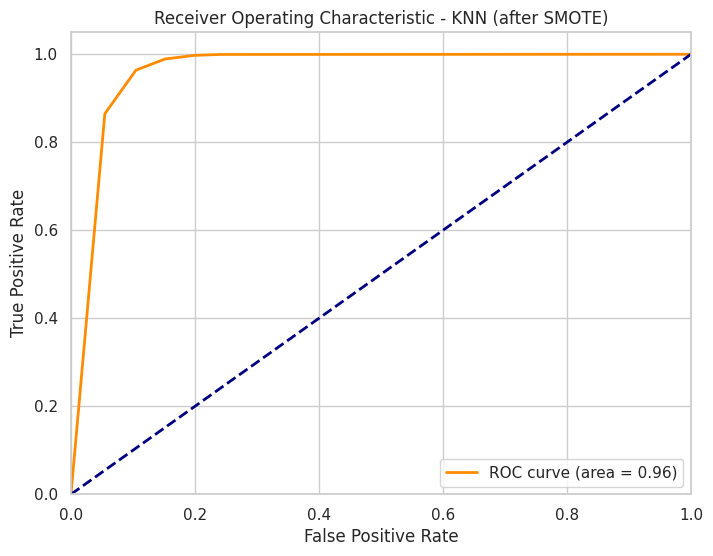

Decision Tree (after SMOTE) - Train Accuracy: 1.0, Test Accuracy: 0.9723514919244457
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     12778
           1       0.97      0.98      0.97     12793

    accuracy                           0.97     25571
   macro avg       0.97      0.97      0.97     25571
weighted avg       0.97      0.97      0.97     25571



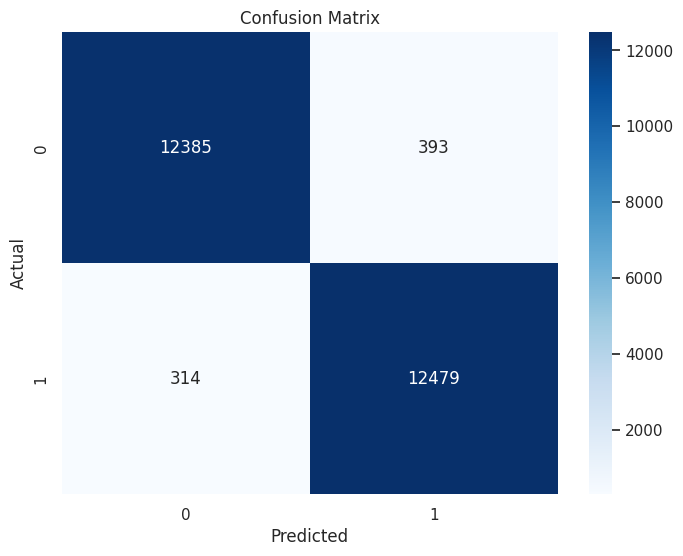

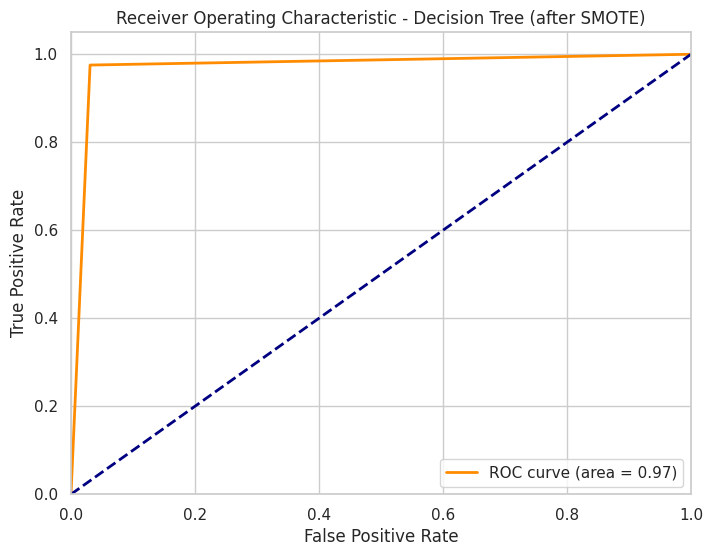

In [18]:
# Train and evaluate each model on the SMOTE data
smote_accuracy_results = {}
for name, model in models.items():
    train_accuracy, test_accuracy, class_report, conf_matrix = train_and_evaluate_model(model, X_train_smote, y_train_smote, X_test_smote, y_test_smote)
    smote_accuracy_results[name] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy}
    print(f"{name} (after SMOTE) - Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
    print("Classification Report:")
    print(class_report)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("\n")
    plot_roc_auc(model, X_test_smote, y_test_smote, f'{name} (after SMOTE)')

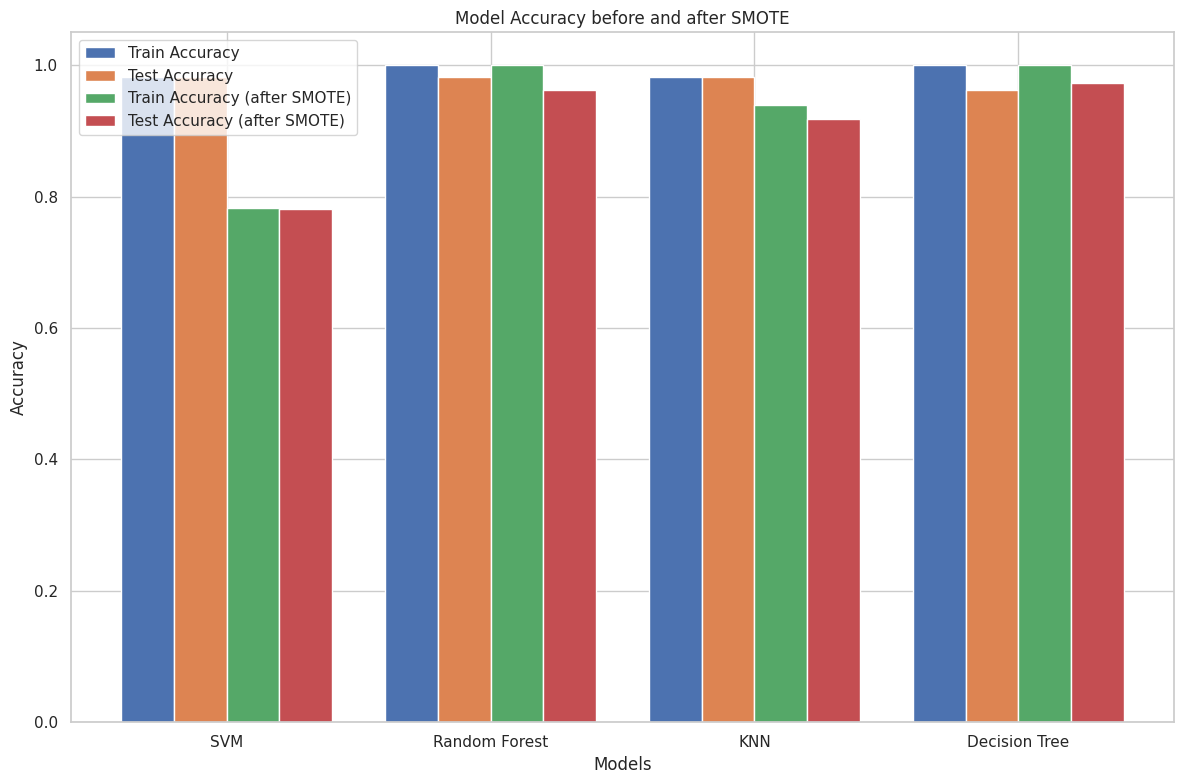

In [19]:
# Plotting Training and Testing Accuracy
labels = list(accuracy_results.keys())
train_accuracy_values = [accuracy_results[name]['train_accuracy'] for name in labels]
test_accuracy_values = [accuracy_results[name]['test_accuracy'] for name in labels]
smote_train_accuracy_values = [smote_accuracy_results[name]['train_accuracy'] for name in labels]
smote_test_accuracy_values = [smote_accuracy_results[name]['test_accuracy'] for name in labels]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, train_accuracy_values, width, label='Train Accuracy')
rects2 = ax.bar(x, test_accuracy_values, width, label='Test Accuracy')
rects3 = ax.bar(x + width, smote_train_accuracy_values, width, label='Train Accuracy (after SMOTE)')
rects4 = ax.bar(x + 2*width, smote_test_accuracy_values, width, label='Test Accuracy (after SMOTE)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Models')
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy before and after SMOTE')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

In [ ]:
import numpy as np
# Perform cross-validation for SMOTE data
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
smote_cv_results = {}
for name, model in models.items():
    cv_scores = cross_val_score(model, X_resampled, y_resampled, cv=cv, scoring='accuracy')
    smote_cv_results[name] = {'mean_cv_score': np.mean(cv_scores), 'std_cv_score': np.std(cv_scores)}
    print(f"{name} (after SMOTE) - Cross-Validation Accuracy: {smote_cv_results[name]['mean_cv_score']:.2f} (+/- {smote_cv_results[name]['std_cv_score']:.2f})")

In [21]:
# Function to take user input and make predictions
def user_input_prediction(model):
    print("\nEnter the following details for prediction:")
    gender = int(input("Gender (0 for Female, 1 for Male): "))
    age = float(input("Age: "))
    hypertension = int(input("Hypertension (0 for No, 1 for Yes): "))
    heart_disease = int(input("Heart Disease (0 for No, 1 for Yes): "))
    ever_married = int(input("Ever Married (0 for No, 1 for Yes): "))
    work_type = int(input("Work Type (0 to 4): "))
    Residence_type = int(input("Residence Type (0 for Urban, 1 for Rural): "))
    avg_glucose_level = float(input("Average Glucose Level: "))
    bmi = float(input("BMI: "))
    smoking_status = int(input("Smoking Status (0 to 2): "))

    # Scale the numerical features
    user_data = np.array([[gender, age, hypertension, heart_disease, ever_married, work_type, Residence_type, avg_glucose_level, bmi, smoking_status]])
    user_data[:, 1:4] = scaler.transform(user_data[:, 1:4])

    # Make prediction
    prediction = model.predict(user_data)
    if prediction == 1:
        print("\nPrediction: The person is likely to have a stroke.")
    else:
        print("\nPrediction: The person is not likely to have a stroke.")

In [22]:
# Identify the best model after SMOTE
best_model_name = max(smote_accuracy_results, key=lambda x: smote_accuracy_results[x]['test_accuracy'])
best_model = models[best_model_name]

# Save the best model as a pickle file
with open('best_model_smote.pkl', 'wb') as file:
    pickle.dump(best_model, file)

print(f"The best model is {best_model_name} and it has been saved as 'best_model_smote.pkl'.")

The best model is Decision Tree and it has been saved as 'best_model_smote.pkl'.


In [23]:
# Load the best model and make a prediction using user input
with open('best_model_smote.pkl', 'rb') as file:
    loaded_model = pickle.load(file)

In [24]:
user_input_prediction(loaded_model)


Enter the following details for prediction:
Gender (0 for Female, 1 for Male): 0
Age: 31
Hypertension (0 for No, 1 for Yes): 0
Heart Disease (0 for No, 1 for Yes): 0
Ever Married (0 for No, 1 for Yes): 1
Work Type (0 to 4): 2
Residence Type (0 for Urban, 1 for Rural): 1
Average Glucose Level: 111.71
BMI: 38.9
Smoking Status (0 to 2): 0

Prediction: The person is not likely to have a stroke.


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


# **Balanced Dataset**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
import pickle

In [2]:
# Load the dataset
file_path = 'Strokesdataset.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0
3,56543,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
4,46136,Male,14.0,0,0,No,Never_worked,Rural,161.28,19.1,NaN,0


In [3]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 id                       0
gender                   0
age                      0
hypertension             0
heart_disease            0
ever_married             0
work_type                0
Residence_type           0
avg_glucose_level        0
bmi                   1462
smoking_status       13292
stroke                   0
dtype: int64


In [4]:
# Data types of each column
data_types = df.dtypes
print("Data Types:\n", data_types)

Data Types:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [5]:
# Fill missing values in the 'smoking_status' column with the mode
df['smoking_status'].fillna(df['smoking_status'].mode()[0], inplace=True)

# Fill missing values in the 'hypertension' column with the most frequent value
df['hypertension'].fillna(df['hypertension'].value_counts().index[0], inplace=True)

# Fill missing values in the 'heart_disease' column with the most frequent value
df['heart_disease'].fillna(df['heart_disease'].value_counts().index[0], inplace=True)

# Fill missing values in the 'avg_glucose_level' column with the mean
df['avg_glucose_level'].fillna(df['avg_glucose_level'].mean(), inplace=True)

# Check for missing values again
missing_values = df.isnull().sum()
print("Missing Values after imputation:\n", missing_values)

Missing Values after imputation:
 id                      0
gender                  0
age                     0
hypertension            0
heart_disease           0
ever_married            0
work_type               0
Residence_type          0
avg_glucose_level       0
bmi                  1462
smoking_status          0
stroke                  0
dtype: int64


In [6]:
# Impute missing values in bmi with the median
imputer_bmi = SimpleImputer(strategy='median')
df['bmi'] = imputer_bmi.fit_transform(df[['bmi']])

# Encode categorical variables
label_encoder = LabelEncoder()
df['gender'] = label_encoder.fit_transform(df['gender'])
df['ever_married'] = label_encoder.fit_transform(df['ever_married'])
df['work_type'] = label_encoder.fit_transform(df['work_type'])
df['Residence_type'] = label_encoder.fit_transform(df['Residence_type'])
df['smoking_status'] = label_encoder.fit_transform(df['smoking_status'])

# Feature scaling
scaler = StandardScaler()
df[['age', 'avg_glucose_level', 'bmi']] = scaler.fit_transform(df[['age', 'avg_glucose_level', 'bmi']])

# Display the cleaned and preprocessed data
df.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,1,-1.741517,0,0,0,4,0,-0.217176,-1.384161,1,0
1,30468,1,0.700823,1,0,1,2,1,-0.383258,1.390824,1,0
2,16523,0,-1.519486,0,0,0,2,1,0.148621,-1.436520,1,0
3,56543,0,1.233697,0,0,1,2,0,-0.822123,0.958869,0,0
4,46136,1,-1.253049,0,0,0,1,0,1.317458,-1.240176,1,0


In [7]:
# Balance the dataset
stroke_1 = df[df['stroke'] == 1]
stroke_0 = df[df['stroke'] == 0].sample(n=750, random_state=42)

balanced_data = pd.concat([stroke_1, stroke_0])

# Splitting features and target
X_balanced = balanced_data.drop(columns=['id', 'stroke'])
y_balanced = balanced_data['stroke']

# Train-test split for the balanced dataset
X_train_balanced, X_test_balanced, y_train_balanced, y_test_balanced = train_test_split(X_balanced, y_balanced, test_size=0.3, random_state=42)

# Save the balanced dataset to a CSV file
balanced_data.to_csv('balanced.csv', index=False)

In [8]:
# Function to train and evaluate models
def train_and_evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    class_report = classification_report(y_test, y_pred_test)
    conf_matrix = confusion_matrix(y_test, y_pred_test)

    # Compute ROC curve and AUC
    y_prob_test = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_prob_test)
    roc_auc = auc(fpr, tpr)

    return train_accuracy, test_accuracy, class_report, conf_matrix, fpr, tpr, roc_auc

# Models
models = {
    'SVM_balanced': SVC(kernel='linear', probability=True),
    'Random_Forest_balanced': RandomForestClassifier(),
    'KNN_balanced': KNeighborsClassifier(),
    'Decision_Tree_balanced': DecisionTreeClassifier()
}

SVM_balanced - Train Accuracy: 0.7698042870456664, Test Accuracy: 0.7478260869565218
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.66      0.73       234
           1       0.71      0.84      0.77       226

    accuracy                           0.75       460
   macro avg       0.76      0.75      0.75       460
weighted avg       0.76      0.75      0.75       460



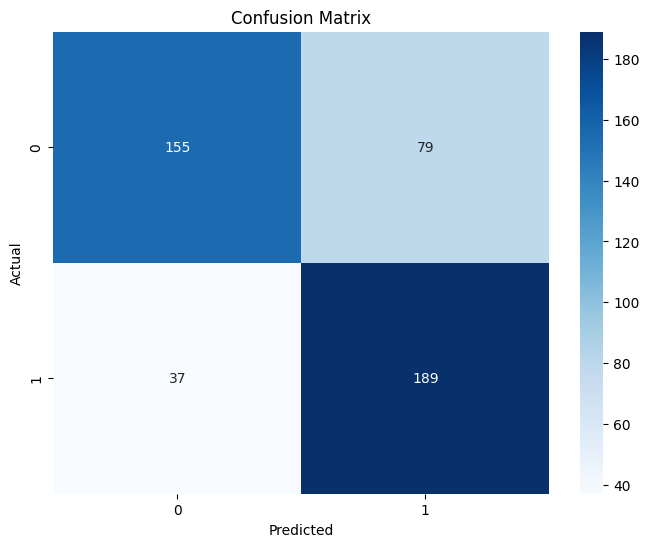



Random_Forest_balanced - Train Accuracy: 1.0, Test Accuracy: 0.7521739130434782
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.67      0.73       234
           1       0.71      0.84      0.77       226

    accuracy                           0.75       460
   macro avg       0.76      0.75      0.75       460
weighted avg       0.76      0.75      0.75       460



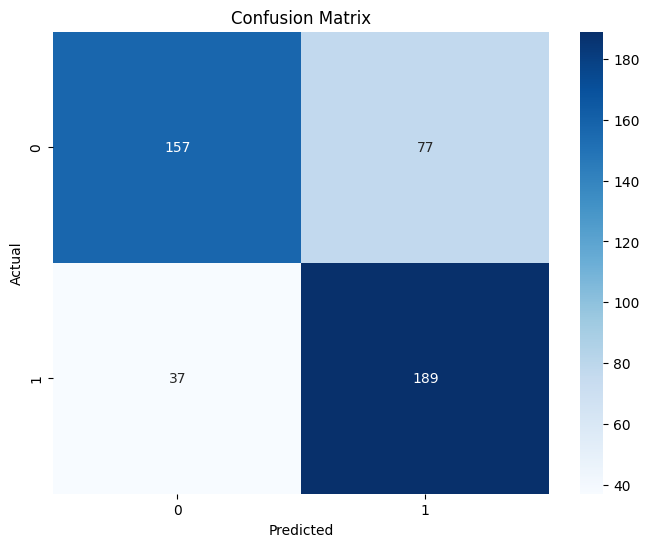



KNN_balanced - Train Accuracy: 0.8145386766076421, Test Accuracy: 0.7195652173913043
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       234
           1       0.69      0.79      0.74       226

    accuracy                           0.72       460
   macro avg       0.72      0.72      0.72       460
weighted avg       0.73      0.72      0.72       460



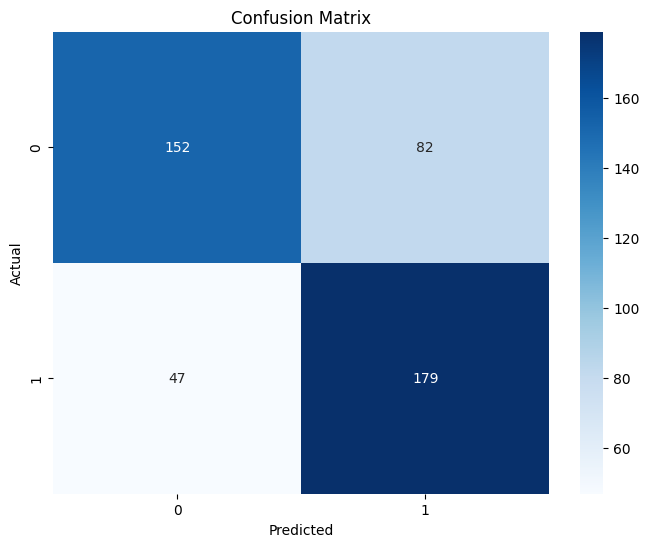



Decision_Tree_balanced - Train Accuracy: 1.0, Test Accuracy: 0.7043478260869566
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.68      0.70       234
           1       0.69      0.73      0.71       226

    accuracy                           0.70       460
   macro avg       0.71      0.70      0.70       460
weighted avg       0.71      0.70      0.70       460



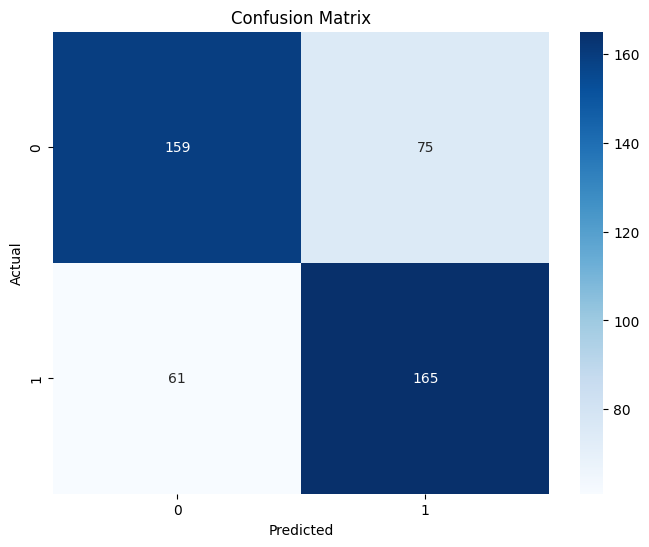

In [9]:
# Train and evaluate each model on balanced data
accuracy_results = {}
for name, model in models.items():
    train_accuracy, test_accuracy, class_report, conf_matrix, fpr, tpr, roc_auc = train_and_evaluate_model(model, X_train_balanced, y_train_balanced, X_test_balanced, y_test_balanced)
    accuracy_results[name] = {'train_accuracy': train_accuracy, 'test_accuracy': test_accuracy, 'fpr': fpr, 'tpr': tpr, 'roc_auc': roc_auc}
    print(f"{name} - Train Accuracy: {train_accuracy}, Test Accuracy: {test_accuracy}")
    print("Classification Report:")
    print(class_report)
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    print("\n")

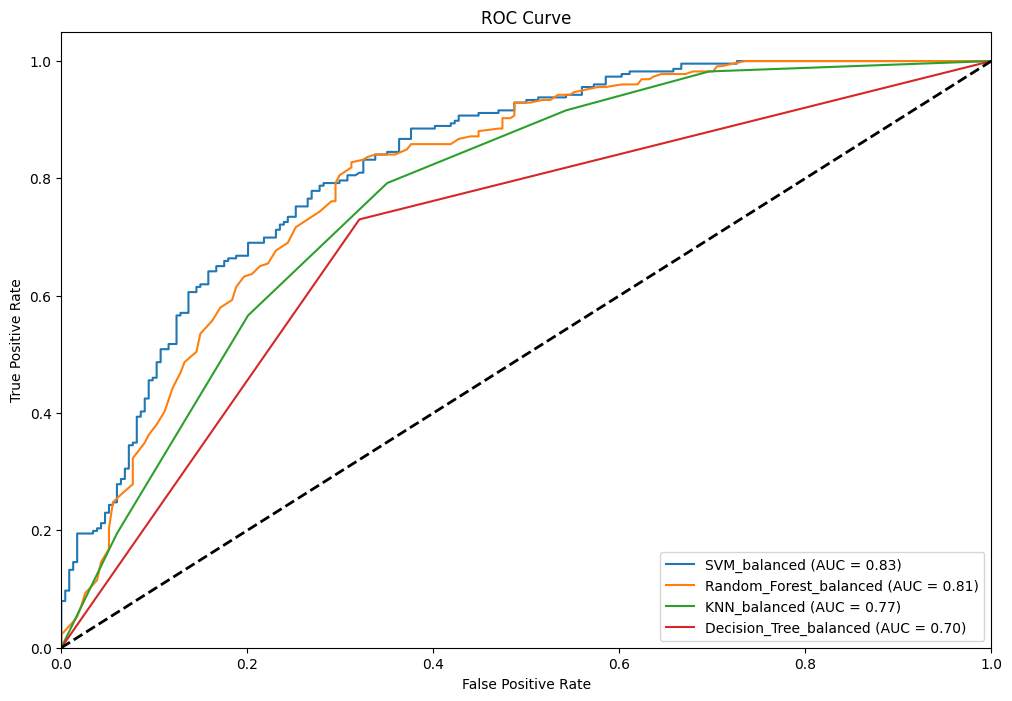

In [10]:
# Plot ROC curves
plt.figure(figsize=(12, 8))
for name, result in accuracy_results.items():
    plt.plot(result['fpr'], result['tpr'], label=f'{name} (AUC = {result["roc_auc"]:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [11]:
# Perform cross-validation for balanced data
cv_results = {}
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
for name, model in models.items():
    cv_scores = cross_val_score(model, X_balanced, y_balanced, cv=cv, scoring='accuracy')
    cv_results[name] = {'mean_cv_score': np.mean(cv_scores), 'std_cv_score': np.std(cv_scores)}
    print(f"{name} - Cross-Validation Accuracy: {cv_results[name]['mean_cv_score']:.2f} (+/- {cv_results[name]['std_cv_score']:.2f})")

SVM_balanced - Cross-Validation Accuracy: 0.76 (+/- 0.01)
Random_Forest_balanced - Cross-Validation Accuracy: 0.75 (+/- 0.03)
KNN_balanced - Cross-Validation Accuracy: 0.72 (+/- 0.03)
Decision_Tree_balanced - Cross-Validation Accuracy: 0.68 (+/- 0.01)


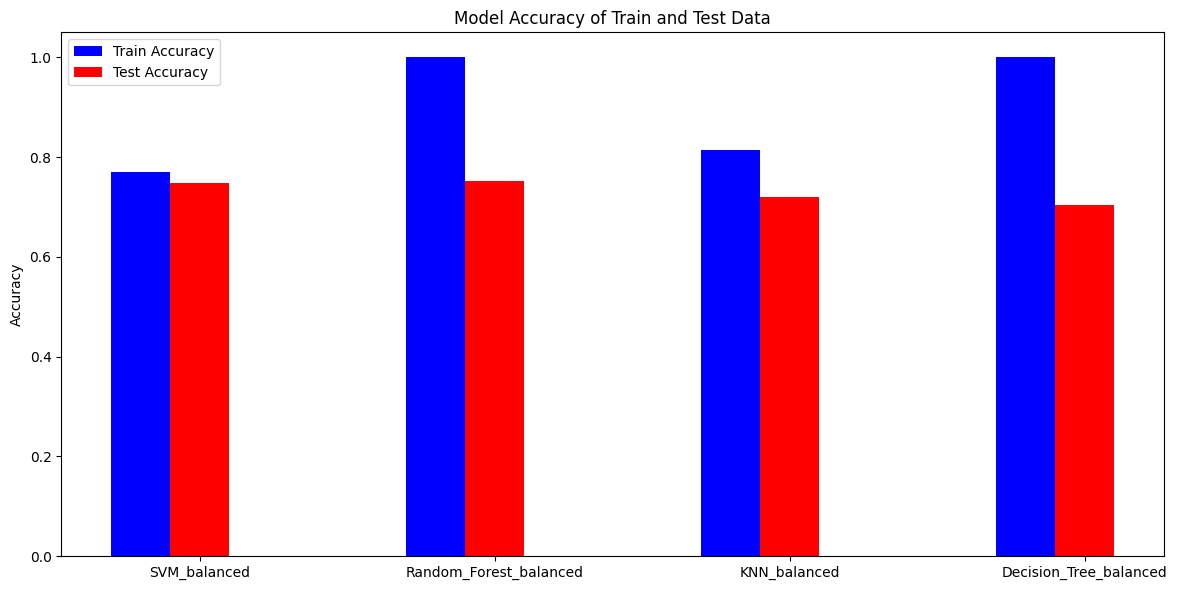

In [12]:
# Plotting Training and Testing Accuracy
labels = list(accuracy_results.keys())
train_accuracy_values = [accuracy_results[name]['train_accuracy'] for name in labels]
test_accuracy_values = [accuracy_results[name]['test_accuracy'] for name in labels]

x = np.arange(len(labels))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width, train_accuracy_values, width, label='Train Accuracy', color='b')
rects2 = ax.bar(x, test_accuracy_values, width, label='Test Accuracy', color='r')

# Add some text for labels, title, and custom x-axis tick labels, etc.
ax.set_ylabel('Accuracy')
ax.set_title('Model Accuracy of Train and Test Data')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()
plt.show()
